
    Introduction: Describes the data and where you got the data. Describe the question being answered and the method(s) being used to answer the question.
    Data pre-processing: What's needed to load the data, clean the data, normalize, etc.
    Model setup: Setup one or more models
    Hyperparameter tuning: Do some playing with the model hyperparameters (learning rate, optimizer, batch size, epochs, whatever makes sense)
    Results: How did the model do
    Discussion: Summarize what worked, what didn't etc.


Here, we are working with the Heart Disease dataset from the UCI Machine Learning Repository. We are using pandas to load the data, specifically the Cleveland dataset, from the UCI ML repository.

The “Heart Disease” data set was obtained from the UC Irvine Machine Learning Repository and it mainly contains 75 different attributes of which 14 are actually used to be studied and analyzed in order to consequently correlate it with the gradual (0 [Absent] - 4 [Present]) presence of heart disease in the patient. The 14 different attributes are the following: 

1. Age
2. Sex
3. Chest Pain
4. Resting Blood Pressure (mm Hg)
5. Serum Cholesterol (mg/dl)
6. Fasting Blood Sugar > 120 (mg/dl)  (1 = True; 0 = False)
7. Resting Electrocardiographic Results (0 = Normal; 1 = Having ST-T wave abnormality; 2 = Showing Probable Left Ventricular Hypertrophy)
8. Maximum Heart Rate Achieved
9. Exercise Induced Angina (1 = Yes; 0 = No)
10. ST Depression Induced by Exercise Relative to Rest
11. Slope of the Peak Exercise ST Segment (1 = Up Sloping; 2 = Flat; 3 = Down Sloping)
12. Number of Major Vessels
13. Thal: (3 = Normal; 6 = Fixed Defect; 7 = Reversible Defect)
14. Diagnosis of Heart Disease (Angiographic Disease Status)

Today’s Typical Diagnosis: 

    Electrocardiogram: Tests Electrical Signals
    Holter Monitoring: Portable Electrocardiogram that’s worn for a day and tests heart activity
    Echocardiogram: Uses sound waves to create an image of the heart in motion. Blood Path
    Exercise Test / Stress Test: Reveals how the heart responds to physical activity 
    Cardia Catheterization: Shows blockages in the heart arteries. Long, thin, flexible tube inserted in a blood vessel usually in the groin and guided to the heart. Dye is inserted to create clear image
    CT Scan: Collects Images of your heart
    Cardiac MRI: Uses Magnetic field and Radio Waves to create a very detailed image of the Heart

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, sep=',', header=None)

This is a preview of the dataframe, with 14 attributes as previously described. As they are currently numerical, they will be converted to actual attributes as per the dataset documentation: https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

In [2]:
# Preview the first 5 rows
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] 

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Here, we are attempting to remove values that do not correspond to the usual numerical values by conducting pre-processing. Here, we convert all non-numerical values to "NA" values and remove the corresponding rows. For the attributes that are described in the dataset as categorical, they are converted to corresponding categorical codes for the sake of simplicity. A standard scaler is not implemented as it is not supported by the current model architecture.

In [5]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df = df.dropna()

In [6]:
df_copy = df.copy()
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for x in cat_cols:
    df_copy[x] = pd.Categorical(df_copy[x])
    df_copy[x] = df_copy[x].cat.codes
df = df_copy

The scaled dataframe is split into explanatory and response variables, X and y. It is converted into training and testing tests for the sake of validation.

In [7]:
X = df.drop('num', axis=1)
y = df['num']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

An XGBoost model is developed and trained on the training dataset, X_train and y_train. A GridSearchCV model with CV = 5 is used to optimize based on various model hyperparameters, including learning rate, n_estimators, and gamma. The ranges chosen are arbritrary and limited for the sake of time in running the GridSearch function. A GPU-accelerated tree-method is used to augment the speed of the program. Nvidia-based GPU implementations of numpy, sklearn, and pandas (cupy, cuml, and cudf) were initially used, but they were unable to support certain datatypes.

Overall, the model performs decently well, considering a test size of only 0.2. This means that 20% of the data is randomly designated as the testing set and the remaining 80% is used for training. While this could be better, it would require further hyperparameter adjustments. Based on the dataset repository, the average accuracy of XGBoost classification models on this dataset is 81.579% and the precision is 83.185%, but the details of the test_size and the parameters used are unknown. This can be found under "Baseline Model Performance" at this link: https://archive-beta.ics.uci.edu/dataset/45/heart+disease

In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()

param_grid = {
    'max_depth': list(range(5)),
    'learning_rate': list(np.arange(0.01, 0.1 + 0.01, 0.01)),
    'n_estimators': list(np.arange(1, 10 + 1, 1)),
    'gamma': list(np.arange(0, 0.05 + 0.01, 0.01)),
    'subsample': list(np.arange(0.5, 1.0 + 0.001, 0.1)),
    'objective': ['binary:logistic'],
    'random_state': [5],
    'enable_categorical': [True],
    'tree_method': ['gpu_hist']
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    error_score='raise',
    n_jobs=-1
)

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None...
                         'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05,
                                           0.060000000000000005,
                                           0.06999999999999999, 0.08, 0.09,
                                           0.09999999999999999],
                         'max_depth': [0, 1, 2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'objective': ['binary:logistic'], 'random_state': [5],
                         'subsample': [0.5, 0.6, 0.7, 0.7999999999999999,
                                       0.8999999999999999, 0.9999999999999999],
                         'tree_method': ['gpu_hist']},
             scoring='accuracy', verbose=1)

Best parameters: {'enable_categorical': True, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 8, 'objective': 'binary:logistic', 'random_state': 5, 'subsample': 0.9999999999999999, 'tree_method': 'gpu_hist'}
Best score: 0.6025709219858156


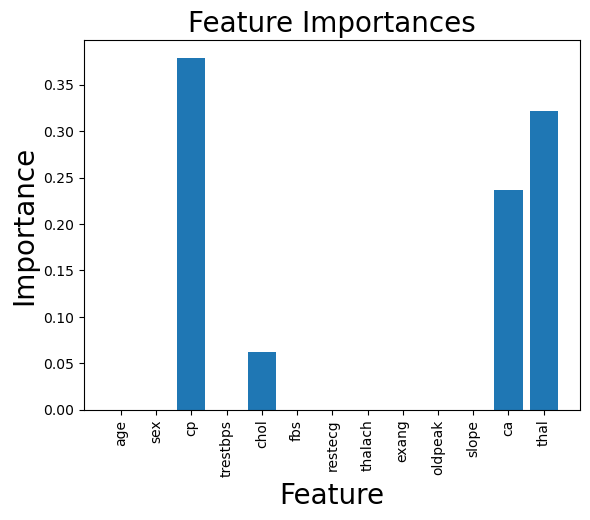

In [12]:
import matplotlib.pyplot as plt

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('Importance', fontsize = 20)
plt.title('Feature Importances', fontsize = 20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Overall, the model worked considerably well for an initial attempt at attempting to use XGBoost, an industry standard decision tree library, for classifying heart disease patients. Greater grid search parameter ranges can aid in producing more-accurate models. Other possible ways of improving this model include proving greater input data, feature engineering (combining features), more hyperparameter tuning, tree ensemble methods (bagging, boosting), more cross-validation, feature selection (recursive feature elimination with logistic regression), and transfer learning. Categorical variables could be treated as such. For example, the 'sex' variable is currently represented as a numeric value (1 = male, 0 = female). This should be converted to a categorical variable with appropriate labels. We could have used logistic regression or decision trees as they may be appropriate for predicting the presence of heart disease. Additionally, our current system does not place enough emphasis on the differences between the categories.